#***SVM Lineal***

Dataset cargado: Breast Cancer Wisconsin
Total de registros: 569
Características usadas para el gráfico: mean radius y mean texture

Entrenando el modelo SVM Lineal...
¡Modelo entrenado!
Precisión del modelo lineal: 90.06%


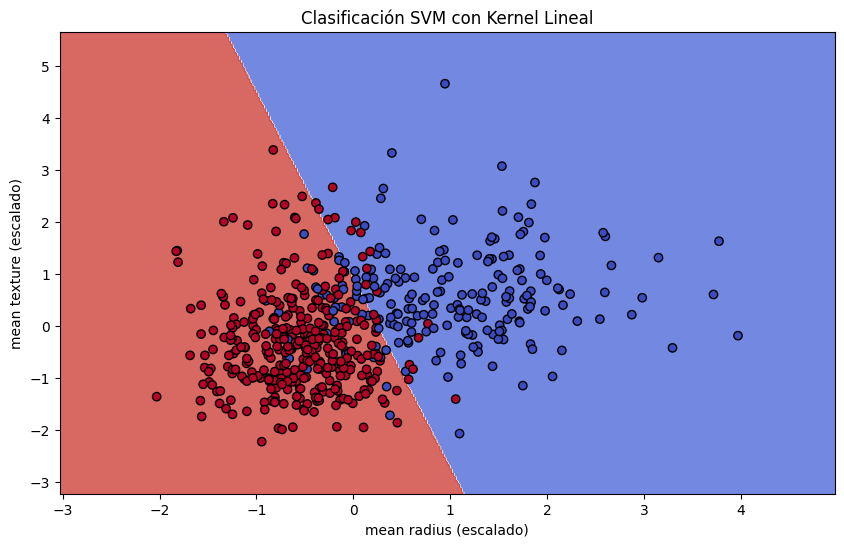

In [7]:
# --- 1. Importar Bibliotecas ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# --- 2. Cargar y Preparar el Dataset (Este dataset es del cancer de mama en Wisconsin, tiene 569 registros y 2 clases, benigno o maligno) ---
cancer = datasets.load_breast_cancer()

# Usamos solo las primeras dos características para poder visualizarlo
X = cancer.data[:, :2]
y = cancer.target

# Obtenemos los nombres de las características para los ejes del gráfico
feature_names = cancer.feature_names
x_label = feature_names[0]
y_label = feature_names[1]

print(f"Dataset cargado: Breast Cancer Wisconsin")
print(f"Total de registros: {X.shape[0]}")
print(f"Características usadas para el gráfico: {x_label} y {y_label}")

# --- 3. Escalar los datos ---
# Escalamos los datos para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. Dividir los datos en Entrenamiento y Prueba ---
# Usamos los datos escalados (X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# --- 5. Crear y Entrenar el Modelo SVM Lineal ---
# kernel='linear' es la opción que define que el modelo sera Lineal, ya que por defecto es radial
svm_lineal = SVC(kernel='linear', C=1.0)

# Entrenamos el modelo con los datos de entrenamiento escalados
print("\nEntrenando el modelo SVM Lineal...")
svm_lineal.fit(X_train, y_train)
print("¡Modelo entrenado!")

# --- 6. Evaluar el Modelo ---
# Hacemos predicciones con los datos de prueba escalados
y_pred = svm_lineal.predict(X_test)

# Calculamos la precisión
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo lineal: {precision * 100:.2f}%")

# --- 7. Visualizar la Frontera de Decisión ---
# (Usamos los datos escalados 'X_scaled' para la gráfica)

# Crear una malla de puntos para graficar
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Obtener predicciones para cada punto en la malla
Z = svm_lineal.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar las áreas de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Graficar los puntos de datos (los reales, también escalados)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(f"{x_label} (escalado)")
plt.ylabel(f"{y_label} (escalado)")
plt.title('Clasificación SVM con Kernel Lineal')
plt.show()

#***Datos***







In [4]:

import pandas as pd

# Cargar el dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Crear un DataFrame de Pandas
df_X = pd.DataFrame(X, columns=cancer.feature_names)
df_X['target'] = y

# Mostramos las primeras 5 filas (en este ejemplo solo usamos las primeras 2 columnas)
print("--- Primeras 5 filas del dataset ---")
display(df_X.head())




--- Primeras 5 filas del dataset ---


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#***SVM Radial***

Dataset cargado: Breast Cancer Wisconsin (Total: 569 registros)

Entrenando el modelo SVM con Kernel Radial...
¡Modelo entrenado!
Precisión del modelo radial (RBF): 90.64%


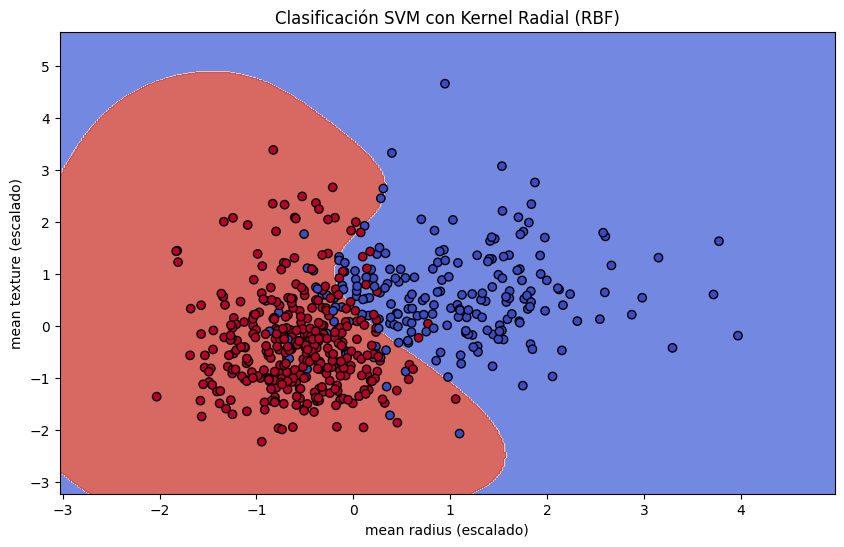

In [6]:
# --- 1. Importar Bibliotecas ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# --- 2. Cargar y Preparar el Dataset (Cancer de mama) ---
cancer = datasets.load_breast_cancer()
X = cancer.data[:, :2] # Usamos las mismas dos características
y = cancer.target

# Nombres para los ejes
feature_names = cancer.feature_names
x_label = feature_names[0]
y_label = feature_names[1]

print(f"Dataset cargado: Breast Cancer Wisconsin (Total: {X.shape[0]} registros)")

# --- 3. Escalar los datos ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. Dividir los datos en Entrenamiento y Prueba ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# --- 5. Crear y Entrenar el Modelo SVM con Kernel Radial (RBF) ---
# kernel='rbf' es la opción por defecto, pero la ponemos para ser explícitos.
# 'gamma' controla cuánta influencia tiene un solo ejemplo de entrenamiento.
# 'C' es el parámetro de regularización.
svm_radial = SVC(kernel='rbf', C=1.0, gamma='auto')

# Entrenamos el modelo
print("\nEntrenando el modelo SVM con Kernel Radial...")
svm_radial.fit(X_train, y_train)
print("¡Modelo entrenado!")

# --- 6. Evaluar el Modelo ---
y_pred = svm_radial.predict(X_test)

# Calculamos la precisión
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo radial (RBF): {precision * 100:.2f}%")

# --- 7. Visualizar la Frontera de Decisión ---
# Crear una malla de puntos
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Obtener predicciones para cada punto en la malla (usando el modelo radial)
Z = svm_radial.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar las áreas de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Graficar los puntos de datos
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(f"{x_label} (escalado)")
plt.ylabel(f"{y_label} (escalado)")
plt.title('Clasificación SVM con Kernel Radial (RBF)')
plt.show()